In [1]:
import numpy as np
import tensorflow as tf
import random as rn
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import LSTM
from keras.layers import Dense, LSTM, Dropout, Activation
from sklearn.preprocessing import MinMaxScaler
import os
import pandas as pd

Using TensorFlow backend.


In [2]:
from keras.utils.vis_utils import plot_model

import matplotlib.pyplot as plt
%matplotlib inline

os.environ['PYTHONHASHSEED'] = '0'

np.random.seed(2017)  
rn.seed(12345)

session_conf = tf.ConfigProto(intra_op_parallelism_threads=1,
                              inter_op_parallelism_threads=1, allow_soft_placement=True, device_count = {'CPU': 1})

from keras import backend as K

tf.set_random_seed(1234)

sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

In [3]:
xy = pd.read_csv('C:/Users/Prajjwal/Downloads/CSV.csv')
print(xy.head(10))

         Date    Open    High     Low   Close  Adj Close   Volume
0  1996-08-09  14.250  16.750  14.250  16.500  15.324463  1601500
1  1996-08-12  16.500  16.750  16.375  16.500  15.324463   260900
2  1996-08-13  16.500  16.750  16.375  16.375  15.208362   162800
3  1996-08-14  16.375  16.625  16.375  16.375  15.208362    59500
4  1996-08-15  16.625  16.625  16.375  16.625  15.440549    62300
5  1996-08-16  16.375  16.625  16.375  16.375  15.208362    40600
6  1996-08-19  16.375  16.750  16.375  16.750  15.556649   381500
7  1996-08-20  16.750  17.250  16.500  17.250  16.021025   115000
8  1996-08-21  17.250  17.625  17.000  17.625  16.369308   167600
9  1996-08-22  17.625  17.875  17.375  17.875  16.601496    42400


In [4]:
xy.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5672.000000,5672.000000,5672.000000,5672.000000,5672.000000,5.672000e+03
mean,11.837339,12.003313,11.669973,11.839539,11.262645,6.335628e+04
std,8.483014,8.567067,8.399875,8.481847,8.222966,8.749770e+04
min,1.187500,1.312500,1.062500,1.187500,1.102897,0.000000e+00
25%,4.750000,4.810000,4.670000,4.750000,4.411587,1.850000e+04
50%,7.370000,7.500000,7.210000,7.405000,6.943535,3.985000e+04
75%,20.000000,20.250000,19.625000,20.000000,19.145096,7.900000e+04
max,29.000000,29.250000,28.840000,29.000000,28.184065,2.073400e+06


In [5]:
print(xy.shape)
#xy=xy.drop(['Unnamed: 0'], axis=1)

(5672, 7)


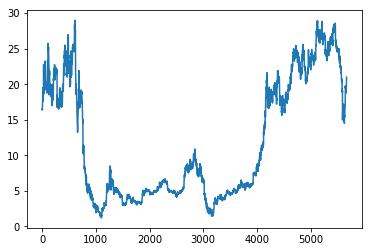

In [6]:
dataset=xy['Close']
plt.figure()
plt.plot(xy['Close'])

In [7]:
print(dataset)

0       16.500000
1       16.500000
2       16.375000
3       16.375000
4       16.625000
5       16.375000
6       16.750000
7       17.250000
8       17.625000
9       17.875000
10      18.750000
11      19.125000
12      19.500000
13      19.000000
14      18.500000
15      18.250000
16      17.750000
17      18.250000
18      17.625000
19      17.750000
20      18.000000
21      18.125000
22      18.000000
23      18.375000
24      18.750000
25      19.625000
26      20.750000
27      22.750000
28      21.500000
29      19.500000
          ...    
5642    16.639999
5643    16.980000
5644    16.860001
5645    16.990000
5646    17.000000
5647    19.260000
5648    19.629999
5649    19.680000
5650    19.660000
5651    19.750000
5652    19.430000
5653    19.680000
5654    19.709999
5655    19.610001
5656    19.450001
5657    19.709999
5658    19.740000
5659    19.750000
5660    19.410000
5661    19.290001
5662    18.740000
5663    18.920000
5664    19.379999
5665    19.410000
5666    19

In [8]:
print(dataset)

0       16.500000
1       16.500000
2       16.375000
3       16.375000
4       16.625000
5       16.375000
6       16.750000
7       17.250000
8       17.625000
9       17.875000
10      18.750000
11      19.125000
12      19.500000
13      19.000000
14      18.500000
15      18.250000
16      17.750000
17      18.250000
18      17.625000
19      17.750000
20      18.000000
21      18.125000
22      18.000000
23      18.375000
24      18.750000
25      19.625000
26      20.750000
27      22.750000
28      21.500000
29      19.500000
          ...    
5642    16.639999
5643    16.980000
5644    16.860001
5645    16.990000
5646    17.000000
5647    19.260000
5648    19.629999
5649    19.680000
5650    19.660000
5651    19.750000
5652    19.430000
5653    19.680000
5654    19.709999
5655    19.610001
5656    19.450001
5657    19.709999
5658    19.740000
5659    19.750000
5660    19.410000
5661    19.290001
5662    18.740000
5663    18.920000
5664    19.379999
5665    19.410000
5666    19

In [9]:
dataset = np.asarray(dataset)
dataset = np.reshape(dataset,(5672,1))

In [10]:
print(dataset)

[[16.5     ]
 [16.5     ]
 [16.375   ]
 ...
 [19.92    ]
 [20.190001]
 [21.      ]]


In [11]:
scaler2 = MinMaxScaler(feature_range=(0, 1))
dataset = scaler2.fit_transform(dataset)

In [12]:
dataset[:10]

array([[0.5505618 ],
       [0.5505618 ],
       [0.54606742],
       [0.54606742],
       [0.55505618],
       [0.54606742],
       [0.55955056],
       [0.57752809],
       [0.59101124],
       [0.6       ]])

In [13]:
np.array(dataset[:10,0])

array([0.5505618 , 0.5505618 , 0.54606742, 0.54606742, 0.55505618,
       0.54606742, 0.55955056, 0.57752809, 0.59101124, 0.6       ])

In [14]:
time_steps = 30
final_data = []
for i in range(len(dataset)-time_steps):
    final_data.append((np.array(dataset[i:i+time_steps,0])))

In [15]:
print(final_data)

[array([0.5505618 , 0.5505618 , 0.54606742, 0.54606742, 0.55505618,
       0.54606742, 0.55955056, 0.57752809, 0.59101124, 0.6       ,
       0.63146067, 0.64494382, 0.65842697, 0.64044944, 0.62247191,
       0.61348315, 0.59550562, 0.61348315, 0.59101124, 0.59550562,
       0.60449438, 0.60898876, 0.60449438, 0.61797753, 0.63146067,
       0.66292135, 0.70337079, 0.7752809 , 0.73033708, 0.65842697]), array([0.5505618 , 0.54606742, 0.54606742, 0.55505618, 0.54606742,
       0.55955056, 0.57752809, 0.59101124, 0.6       , 0.63146067,
       0.64494382, 0.65842697, 0.64044944, 0.62247191, 0.61348315,
       0.59550562, 0.61348315, 0.59101124, 0.59550562, 0.60449438,
       0.60898876, 0.60449438, 0.61797753, 0.63146067, 0.66292135,
       0.70337079, 0.7752809 , 0.73033708, 0.65842697, 0.64044944]), array([0.54606742, 0.54606742, 0.55505618, 0.54606742, 0.55955056,
       0.57752809, 0.59101124, 0.6       , 0.63146067, 0.64494382,
       0.65842697, 0.64044944, 0.62247191, 0.61348315, 0.

In [16]:
final_data = np.array(final_data)
print(np.shape(np.array(final_data)))

(5642, 30)


In [17]:
trainX1,trainY1 = final_data[:4512,0:29],final_data[:4512,[29]]
testX1,testY1 = final_data[4512:,0:29],final_data[4512:,[29]]

In [18]:
trainX1.shape

(4512, 29)

In [19]:
trainX1

array([[0.5505618 , 0.5505618 , 0.54606742, ..., 0.70337079, 0.7752809 ,
        0.73033708],
       [0.5505618 , 0.54606742, 0.54606742, ..., 0.7752809 , 0.73033708,
        0.65842697],
       [0.54606742, 0.54606742, 0.55505618, ..., 0.73033708, 0.65842697,
        0.64044944],
       ...,
       [0.54193258, 0.5512809 , 0.53977532, ..., 0.62570787, 0.62067419,
        0.61923596],
       [0.5512809 , 0.53977532, 0.53761794, ..., 0.62067419, 0.61923596,
        0.63469663],
       [0.53977532, 0.53761794, 0.53402251, ..., 0.61923596, 0.63469663,
        0.62211236]])

In [20]:
trainY1.shape

(4512, 1)

In [21]:
trainY1

array([[0.65842697],
       [0.64044944],
       [0.62696629],
       ...,
       [0.63469663],
       [0.62211236],
       [0.6188764 ]])

In [22]:
testX1.shape

(1130, 29)

In [23]:
trainX1 = np.reshape(trainX1, (trainX1.shape[0], 1, trainX1.shape[1]))
testX1 = np.reshape(testX1, (testX1.shape[0], 1, testX1.shape[1]))

In [24]:
trainX1.shape

(4512, 1, 29)

In [25]:
trainX1

array([[[0.5505618 , 0.5505618 , 0.54606742, ..., 0.70337079,
         0.7752809 , 0.73033708]],

       [[0.5505618 , 0.54606742, 0.54606742, ..., 0.7752809 ,
         0.73033708, 0.65842697]],

       [[0.54606742, 0.54606742, 0.55505618, ..., 0.73033708,
         0.65842697, 0.64044944]],

       ...,

       [[0.54193258, 0.5512809 , 0.53977532, ..., 0.62570787,
         0.62067419, 0.61923596]],

       [[0.5512809 , 0.53977532, 0.53761794, ..., 0.62067419,
         0.61923596, 0.63469663]],

       [[0.53977532, 0.53761794, 0.53402251, ..., 0.61923596,
         0.63469663, 0.62211236]]])

In [30]:
from keras.layers import Bidirectional
from keras.optimizers import Adam,SGD
from keras import optimizers
from keras import regularizers

In [27]:
import random
random.seed(5)

In [28]:
model = Sequential()
look_back = 29

In [31]:
model.add(Bidirectional(LSTM(29,input_shape = (1,look_back),kernel_regularizer = regularizers.l2(0.01),activity_regularizer = regularizers.l1(0.01))))
model.add(Dense(1))

In [32]:
model.compile(loss='mean_squared_error', optimizer='Adam',metrics=['mape'])
history1 = model.fit(trainX1, trainY1, epochs=20,validation_data = (testX1,testY1), batch_size=1, verbose=2)

Train on 4512 samples, validate on 1130 samples
Epoch 1/20
 - 34s - loss: 0.0279 - mean_absolute_percentage_error: 10410.0372 - val_loss: 0.0122 - val_mean_absolute_percentage_error: 5.3579
Epoch 2/20
 - 30s - loss: 0.0047 - mean_absolute_percentage_error: 9223.6064 - val_loss: 0.0095 - val_mean_absolute_percentage_error: 5.3967
Epoch 3/20
 - 32s - loss: 0.0036 - mean_absolute_percentage_error: 7569.2399 - val_loss: 0.0066 - val_mean_absolute_percentage_error: 3.1118
Epoch 4/20
 - 32s - loss: 0.0032 - mean_absolute_percentage_error: 6326.0528 - val_loss: 0.0061 - val_mean_absolute_percentage_error: 3.5428
Epoch 5/20
 - 32s - loss: 0.0031 - mean_absolute_percentage_error: 5793.7225 - val_loss: 0.0137 - val_mean_absolute_percentage_error: 11.2876
Epoch 6/20
 - 31s - loss: 0.0030 - mean_absolute_percentage_error: 8644.2612 - val_loss: 0.0051 - val_mean_absolute_percentage_error: 2.6597
Epoch 7/20
 - 32s - loss: 0.0027 - mean_absolute_percentage_error: 5493.8815 - val_loss: 0.0047 - val_me

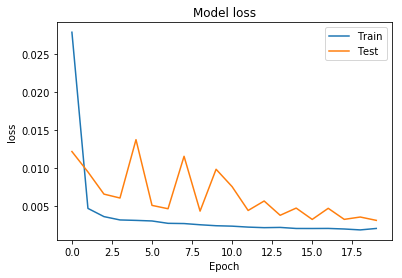

In [33]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error , r2_score

In [35]:
trainPredict1 = model.predict(trainX1)

In [36]:
testPredict1 = model.predict(testX1)

In [37]:
r2_score(testPredict1,testY1)

0.9271231650508756

In [38]:
from sklearn.metrics import mean_squared_error
from math import sqrt
MSE1=mean_squared_error(testY1, testPredict1)
print("MSE:",MSE1)

RMSE1=sqrt(MSE1)
print("RMSE:",RMSE1)

MSE: 0.0007050902872149653
RMSE: 0.026553536246891208


In [39]:
trainPredict1 = scaler2.inverse_transform(trainPredict1)
trainY1 = scaler2.inverse_transform(trainY1)
testPredict1 = scaler2.inverse_transform(testPredict1)
testY1 = scaler2.inverse_transform(testY1)

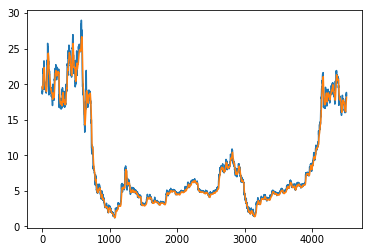

In [40]:
plt.plot(trainY1)
plt.plot(trainPredict1)
plt.show()

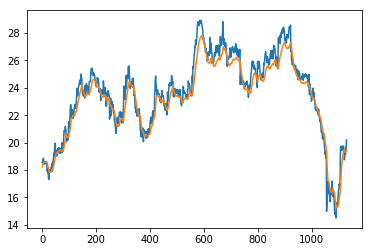

In [42]:
plt.plot(testY1)
plt.plot(testPredict1)
plt.show()